# ToDo List:
1. spatial nodes class
2. agents class
    1. Coding Actions
3. resource distribution function(s)
4. Iteration of simulation
5. Data collection + vis

In [19]:
from coop import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation
%matplotlib inline

In [20]:
#### Generate grid
width = 20
height = 20
grid = createRectangleGrid(width, height)

In [21]:
### Generate some individuals
agentList = []
popSize = 100
for i in range(popSize):
    rx = np.random.randint(0, width)
    ry = np.random.randint(0, height)
    while(grid[rx][ry].agentHere != None):
        rx = np.random.randint(0, width)
        ry = np.random.randint(0, height)
    a = Agent(rx, ry, 2)
    grid[rx][ry].agentHere = a
    a.nodeAt = grid[rx][ry]
    a.randomizeBrain()
    agentList.append(a)

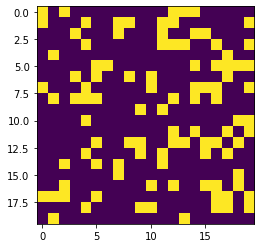

In [22]:
### visualize grid
image = np.zeros((width, height))
for i in range(width):
    for j in range(width):
        if(grid[i][j].agentHere != None):
            image[i,j] = 1
plt.figure()
plt.imshow(image)
plt.show()

In [23]:
#### Simulation Test
iterations = 100
anim = np.zeros((width, height, iterations))
for i in range(iterations):
    agentsToKill = []
    for a in agentList:
        anim[a.x, a.y, i] = a.resources
        a.calcSenseVector()
        a.calcAction()
        a.takeAction()
        if(a.resources < 0.0):
            agentsToKill.append(a)
    for a in agentsToKill:
        agentList.remove(a)

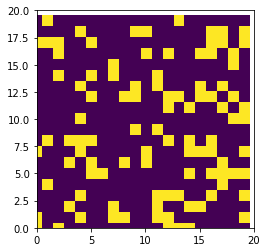

In [24]:
### visualize animation
fig, ax = plt.subplots()

ax.set_xlim((0, width))
ax.set_ylim((0, height))

im = ax.imshow(anim[:,:,0])

def init():
    im.set_data(anim[:,:,0])
    return (im,)

# animation function. This is called sequentially
def animate(i):
    data_slice = anim[:,:,i]
    im.set_data(data_slice)
    return (im,)

# call the animator. blit=True means only re-draw the parts that have changed.
animate = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=iterations, interval=20, blit=False)

HTML(animate.to_html5_video())